In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df=pd.read_excel("lung_disease.xlsx")

In [ ]:
df.describe()

,FVC,FEC1,AGE
count,470.000000,470.000000,470.000000
mean,3.281574,4.568702,62.534043
std,0.871426,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        470 non-null    object 
 1   smoke          470 non-null    object 
 2   FVC            470 non-null    float64
 3   FEC1           470 non-null    float64
 4   PEFR           470 non-null    object 
 5   O2             470 non-null    object 
 6   ABG-P-O2       470 non-null    object 
 7   ABG-P-CO2      470 non-null    object 
 8   ABG-pH Level   470 non-null    object 
 9   Scan           470 non-null    object 
 10  Asthama        470 non-null    object 
 11  Other diseaes  470 non-null    object 
 12  AGE            470 non-null    int64  
 13  Risk           470 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 51.5+ KB


In [ ]:
df.head(2)

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,T,2.85,2.16,F,F,F,T,T,X-ray,F,F,60,F
1,Patient-2,F,3.40,1.88,F,F,F,F,F,MRI,T,F,51,F


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['smoke']= label_encoder.fit_transform(df['smoke'])

df['smoke'].unique()

array([1, 0])

In [ ]:
df['smoke'].head()

In [ ]:
df['PEFR']= label_encoder.fit_transform(df['PEFR'])
df['PEFR'].unique()

array([0, 1])

In [ ]:
df['O2']= label_encoder.fit_transform(df['O2'])
df['O2'].unique()

array([0, 1])

In [ ]:
df['ABG-P-O2']= label_encoder.fit_transform(df['ABG-P-O2'])
df['ABG-P-O2'].unique()

array([0, 1])

In [ ]:
df['ABG-pH Level']= label_encoder.fit_transform(df['ABG-pH Level'])
df['ABG-pH Level'].unique()

array([1, 0])

In [ ]:
df['ABG-P-CO2']= label_encoder.fit_transform(df['ABG-P-CO2'])
df['ABG-P-CO2'].unique()

array([1, 0])

In [ ]:
df['Asthama']= label_encoder.fit_transform(df['Asthama'])
df['Asthama'].unique()

array([0, 1])

In [ ]:
df['Other diseaes']= label_encoder.fit_transform(df['Other diseaes'])
df['Other diseaes'].unique()

array([0, 1])

In [ ]:
df['Risk']= label_encoder.fit_transform(df['Risk'])
df['Risk'].unique()

array([0, 1])

In [ ]:
df['Scan']= label_encoder.fit_transform(df['Scan'])
df['Scan'].unique()

array([2, 1, 0])

In [ ]:
df.head()

,Patient,smoke,FVC,FEC1,PEFR,O2,ABG-P-O2,ABG-P-CO2,ABG-pH Level,Scan,Asthama,Other diseaes,AGE,Risk
0,Patient-1,1,2.85,2.16,0,0,0,1,1,2,0,0,60,0
1,Patient-2,0,3.40,1.88,0,0,0,0,0,1,1,0,51,0
2,Patient-3,0,2.76,2.08,0,0,0,1,0,2,0,0,59,0
3,Patient-4,0,3.68,3.04,0,0,0,0,0,2,0,0,54,0
4,Patient-5,0,2.44,0.96,0,1,0,1,1,2,0,0,73,1


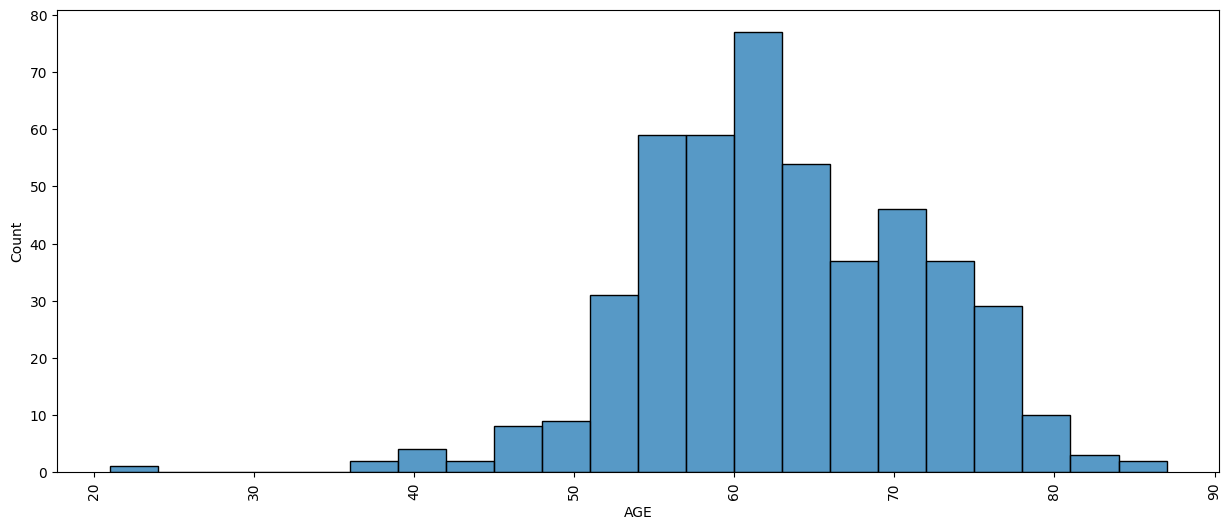

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['AGE'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df=df.drop(['Patient'], axis=1)

In [ ]:
x = df.drop('Risk', axis = 1)
y = df['Risk']

In [ ]:
 x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

In [ ]:
print("Mean absolute error is ",( mean_absolute_error(y_test,y_pred)))
print("Mean squared  error is " , mean_squared_error(y_test,y_pred))
print("Median absolute error is " ,median_absolute_error(y_test,y_pred))
print("Accuracy is " , round(accuracy_score(y_test,y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(y_test,y_pred, average='weighted')*100,2),"%")

Mean absolute error is  0.17796610169491525
Mean squared  error is  0.17796610169491525
Median absolute error is  0.0
Accuracy is  82.2 %
F1 score:  74.17 %


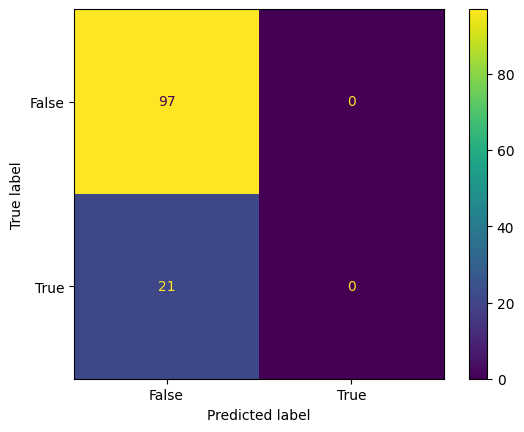

In [ ]:
from sklearn import metrics
actual=y_test
predicted=y_pred
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()